<h1> 1.1 Implement The 1D GA Algorithm

In [22]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt  
import sklearn

<h2> 1

In [2]:
# x0 = 5

# a) What is the correct location of the maximum of this function? 
#  location of max: x = 0

# b) What is the gradient vector of the function? What is it's dimension?
# gradient vector of the function: f = < -2x >
# dimension: 1x1

# c) Compute the gradient at x0, grad f(x)
#   grad f(x0) = -2(x0)
# gradient at x0 is = -2(5) = -10

# d) Compute x1 = x0 + R * grad f(x0)
# x1 = 5 + 0.1 * -10
# x1 = 4

# e) Yes, We moved closer to the maximum having it closer to zero.

<h2> 2

In [7]:
def gradientAscent(x0, p, e, R):
    curMax = x0
    prevMax = x0
    for step in range(0, R):
        prevMax = curMax
        if step == 0:
            curMax = grad(prevMax)
        else:
            curMax = prevMax + (p * grad(prevMax))
            print(' ')
            print("step: ", step)
            print("x: ", prevMax)
            print("f(x): ", f(curMax))
            print("grad f(x): ", curMax)
            if stop(curMax, prevMax, e):
                break
                
def stop(a, b, e):
    return (abs(b) - abs(a) < e)

def grad(x):
    return -2*x

def f(x):
    return -x**2

gradientAscent(10, 0.1, 0.5, 100)

 
step:  1
x:  -20
f(x):  -256.0
grad f(x):  -16.0
 
step:  2
x:  -16.0
f(x):  -163.84000000000003
grad f(x):  -12.8
 
step:  3
x:  -12.8
f(x):  -104.8576
grad f(x):  -10.24
 
step:  4
x:  -10.24
f(x):  -67.108864
grad f(x):  -8.192
 
step:  5
x:  -8.192
f(x):  -42.94967296
grad f(x):  -6.5536
 
step:  6
x:  -6.5536
f(x):  -27.487790694400005
grad f(x):  -5.24288
 
step:  7
x:  -5.24288
f(x):  -17.592186044416007
grad f(x):  -4.194304000000001
 
step:  8
x:  -4.194304000000001
f(x):  -11.258999068426245
grad f(x):  -3.3554432000000007
 
step:  9
x:  -3.3554432000000007
f(x):  -7.205759403792796
grad f(x):  -2.6843545600000005
 
step:  10
x:  -2.6843545600000005
f(x):  -4.61168601842739
grad f(x):  -2.1474836480000006
 
step:  11
x:  -2.1474836480000006
f(x):  -2.95147905179353
grad f(x):  -1.7179869184000005


<h2> 3

In [8]:
# Change starting values
gradientAscent(3, 0.1, 0.5, 100) 
# 5 steps, -1.966
gradientAscent(8, 0.1, 0.5, 100) 
# 10 steps, -1.718
gradientAscent(12, 0.1, 0.5, 100) 
# 12 steps, -1.649

# Increasing starting values or more steps leads closer to the maximum

# Increase learning rate
gradientAscent(10, 0.1, 0.5, 100) 
# 11 steps, -1.717
gradientAscent(10, 0.4, 0.5, 100) 
# 4 steps, -0.0319
gradientAscent(10, 1.0, 0.5, 100) 
# 7 steps, 0.5598

# Less steps leads closer to max but may pass maximum

# changed stopping parameter values
gradientAscent(10, 0.1, 1.0, 100) 
# 8 steps, 3.355
gradientAscent(10, 0.1, 0.5, 100) 
# 11 steps, -1.717
gradientAscent(10, 0.1, 0.1, 100) 
# 18 steps, -0.360

# Result: More steps and we get closer to the maximum

 
step:  1
x:  -6
f(x):  -23.04
grad f(x):  -4.8
 
step:  2
x:  -4.8
f(x):  -14.7456
grad f(x):  -3.84
 
step:  3
x:  -3.84
f(x):  -9.437184
grad f(x):  -3.072
 
step:  4
x:  -3.072
f(x):  -6.039797760000001
grad f(x):  -2.4576000000000002
 
step:  5
x:  -2.4576000000000002
f(x):  -3.865470566400001
grad f(x):  -1.9660800000000003
 
step:  1
x:  -16
f(x):  -163.84000000000003
grad f(x):  -12.8
 
step:  2
x:  -12.8
f(x):  -104.8576
grad f(x):  -10.24
 
step:  3
x:  -10.24
f(x):  -67.108864
grad f(x):  -8.192
 
step:  4
x:  -8.192
f(x):  -42.94967296
grad f(x):  -6.5536
 
step:  5
x:  -6.5536
f(x):  -27.487790694400005
grad f(x):  -5.24288
 
step:  6
x:  -5.24288
f(x):  -17.592186044416007
grad f(x):  -4.194304000000001
 
step:  7
x:  -4.194304000000001
f(x):  -11.258999068426245
grad f(x):  -3.3554432000000007
 
step:  8
x:  -3.3554432000000007
f(x):  -7.205759403792796
grad f(x):  -2.6843545600000005
 
step:  9
x:  -2.6843545600000005
f(x):  -4.61168601842739
grad f(x):  -2.14748364800

<h1> Implement The 2D Version

In [10]:
guess = -3; step = 0.1; precision = 10**-6

def GA(M,guess, step, precision):
    i=0
    guessList = [];
    guessList.append([guess.item(0), guess.item(1)])
    while  ( all(m > precision for m in ( abs(-2 * M.dot(guess)))) ) and i < 1000:
        guess = guess + step * -2 * M.dot(guess)
        guessList.append([guess.item(0), guess.item(1)])
        i = i + 1
    print(i)
    print(-2 * M.dot(guess))
    return guessList;

<h2> 5

In [14]:
# For the problem to have a single maximum, it must be a quadratic function 
# whose highest-degree term is to the second degree

In [24]:
def stop(cur, prev, e):
    return (abs(cur.item(0) - prev.item(0)) < e) or (abs(cur.item(1) - prev.item(0)) < e)

def grad(x, A):
    return -2*A*x

def f(x, A):
    return -1*x.T*A*x

def gradientAscentMultiDim(x0, A, p, e, R, showSteps=True, showPlot=True):
    # plot setup
    if (showPlot):
        plt.axes().set_aspect('equal', 'datalim')
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)

    curMax = x0
    prevMax = x0
    for step in range(0, R):
        prevMax = curMax
        if step == 0:
            curMax = grad(prevMax, A)
        else:
            curMax = prevMax + (p * grad(prevMax, A))
            if (showSteps):
                print(' ')
                print("step: ", step)
                print("x: ", prevMax)
                print("f(x): ", f(curMax, A))
                print("grad f(x): ", curMax)
            if (showPlot):
                plt.plot([prevMax.item(0), curMax.item(0)], [prevMax.item(1), curMax.item(1)])
            if stop(curMax, prevMax, e):
                break

 
step:  1
x:  [[ 8]
 [40]]
f(x):  [[-6139.4944]]
grad f(x):  [[  4.48]
 [ 26.56]]
 
step:  2
x:  [[  4.48]
 [ 26.56]]
f(x):  [[-2665.81639168]]
grad f(x):  [[  2.176 ]
 [ 17.7024]]
 
step:  3
x:  [[  2.176 ]
 [ 17.7024]]
f(x):  [[-1158.32921784]]
grad f(x):  [[  0.672768]
 [ 11.863552]]
 
step:  4
x:  [[  0.672768]
 [ 11.863552]]
f(x):  [[-504.08829773]]
grad f(x):  [[-0.30322688]
 [ 8.01339392]]
 
step:  5
x:  [[-0.30322688]
 [ 8.01339392]]
f(x):  [[-220.12240853]]
grad f(x):  [[-0.93216932]
 [ 5.47336602]]
 
step:  6
x:  [[-0.93216932]
 [ 5.47336602]]
f(x):  [[-96.84227469]]
grad f(x):  [[-1.33275183]
 [ 3.79646244]]
 
step:  7
x:  [[-1.33275183]
 [ 3.79646244]]
f(x):  [[-43.29489176]]
grad f(x):  [[-1.58315875]
 [ 2.6882146 ]]
 
step:  8
x:  [[-1.58315875]
 [ 2.6882146 ]]
f(x):  [[-20.01041053]]
grad f(x):  [[-1.73488957]
 [ 1.95463863]]
 
step:  9
x:  [[-1.73488957]
 [ 1.95463863]]
f(x):  [[-9.86050865]]
grad f(x):  [[-1.82186507]
 [ 1.46794543]]
 
step:  10
x:  [[-1.82186507]
 [ 

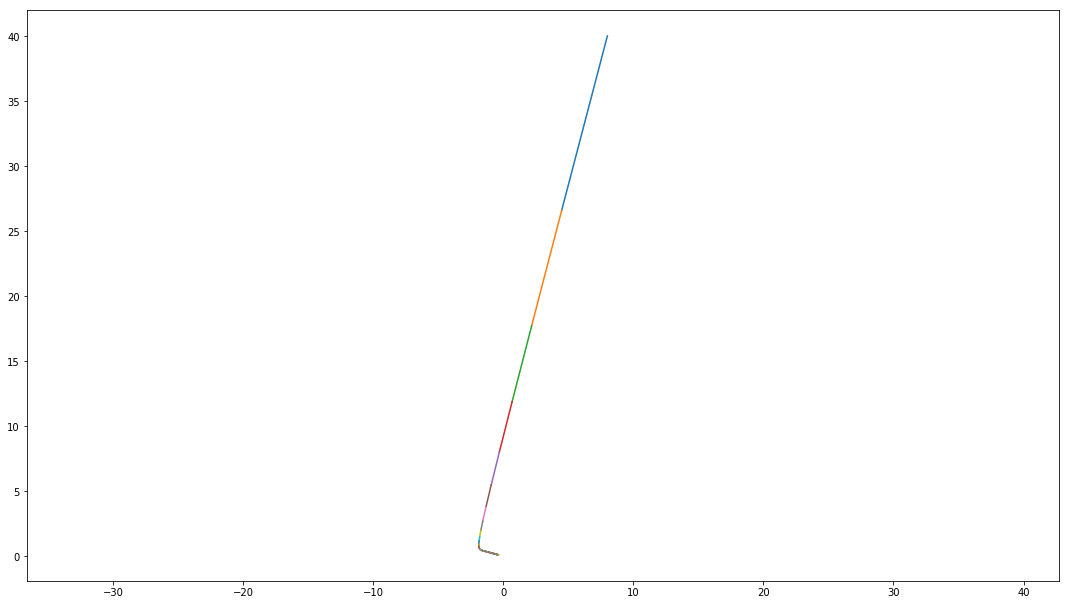

In [25]:
gradientAscentMultiDim(np.matrix([[2, -3]]).T, np.matrix([[1, 2], [2, 8]]), 0.02, 0.0005, 100, True, True)

 
step:  1
x:  [[-2900]
 [-4000]
 [-5100]
 [-6200]
 [-7300]]
f(x):  [[ -5.26224150e+09]]
grad f(x):  [[-1938.]
 [-2688.]
 [-3438.]
 [-4188.]
 [-4938.]]
 
step:  2
x:  [[-1938.]
 [-2688.]
 [-3438.]
 [-4188.]
 [-4938.]]
f(x):  [[ -2.39590428e+09]]
grad f(x):  [[-1289.16]
 [-1802.88]
 [-2316.6 ]
 [-2830.32]
 [-3344.04]]
 
step:  3
x:  [[-1289.16]
 [-1802.88]
 [-2316.6 ]
 [-2830.32]
 [-3344.04]]
f(x):  [[ -1.09086431e+09]]
grad f(x):  [[ -851.6232]
 [-1205.7984]
 [-1559.9736]
 [-1914.1488]
 [-2268.324 ]]
 
step:  4
x:  [[ -851.6232]
 [-1205.7984]
 [-1559.9736]
 [-1914.1488]
 [-2268.324 ]]
f(x):  [[ -4.96680946e+08]]
grad f(x):  [[ -556.660944]
 [ -803.07072 ]
 [-1049.480496]
 [-1295.890272]
 [-1542.300048]]
 
step:  5
x:  [[ -556.660944]
 [ -803.07072 ]
 [-1049.480496]
 [-1295.890272]
 [-1542.300048]]
f(x):  [[ -2.26149686e+08]]
grad f(x):  [[ -357.89806368]
 [ -531.48261888]
 [ -705.06717408]
 [ -878.65172928]
 [-1052.23628448]]
 
step:  6
x:  [[ -357.89806368]
 [ -531.48261888]
 [ -705.0

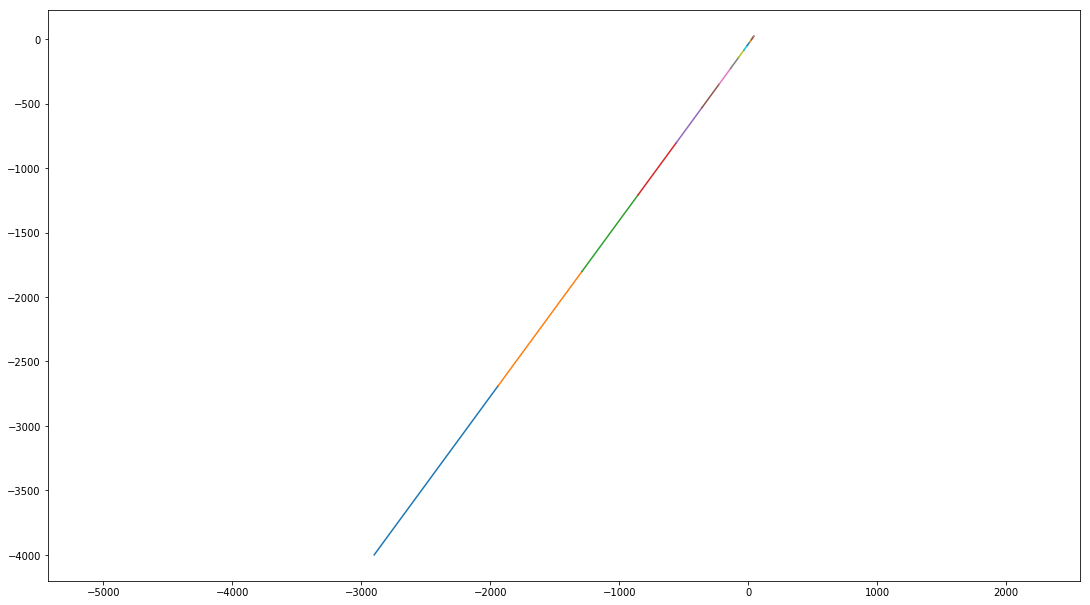

In [26]:
A5D = np.matrix([[11, 4, 7, 10, 13], [4, 17, 10, 13, 16], [7, 10, 23, 16, 19], [10, 13, 16, 29, 22], [13, 16, 19, 22, 35]])
                
gradientAscentMultiDim(np.matrix([[10, 20, 30, 40, 50]]).T, A5D, 0.002, 0.005, 20, True, True)

<h2> Condition Numbers

In [28]:
# Compute condition number
np.linalg.cond(A5D)

22.037957076517493

In [29]:
# Show on computer that the following matrix is singular
simple = np.matrix([[1, 1], [1, 1]])
np.linalg.det(simple)
# the determinant is 0, therefore this matrix is singular

0.0

-------------
C:  [[ 101.    1.]
 [   1.  101.]]

alpha:  100

Conditional #:  1.02

Eigenvalues:  [ 102.  100.]

Non-Singular:  True
 
step:  1
x:  [[-1616.   -16.]
 [  -16. -1616.]]
f(x):  [[ -1.67986991e+08  -4.14699112e+06]
 [ -4.14699112e+06  -1.67986991e+08]]
grad f(x):  [[-1289.536    -9.536]
 [   -9.536 -1289.536]]
 
step:  2
x:  [[-1289.536    -9.536]
 [   -9.536 -1289.536]]
f(x):  [[ -1.06962223e+08  -2.10462265e+06]
 [ -2.10462265e+06  -1.06962223e+08]]
grad f(x):  [[-1029.030656    -5.030656]
 [   -5.030656 -1029.030656]]
 
step:  3
x:  [[-1029.030656    -5.030656]
 [   -5.030656 -1029.030656]]
f(x):  [[-68107681.12309891   -998817.12309891]
 [  -998817.12309891 -68107681.12309891]]
grad f(x):  [[-821.15640218   -1.95640218]
 [  -1.95640218 -821.15640218]]
 
step:  4
x:  [[-821.15640218   -1.95640218]
 [  -1.95640218 -821.15640218]]
f(x):  [[-43368327.97638144   -418655.01638144]
 [  -418655.01638144 -43368327.97638144]]
grad f(x):  [[ -6.55278896e+02   8.11038679e-02]
 [  

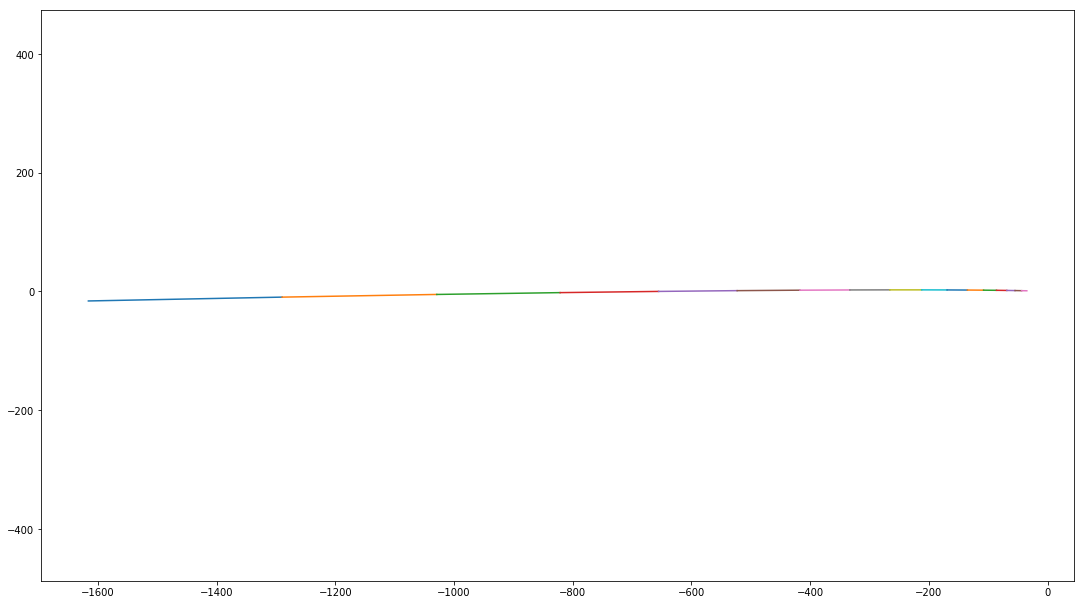

In [30]:
alpha = 100
C = np.matrix([[1, 1], [1, 1]]) + alpha * np.identity(2)
condNum = np.linalg.cond(C)
eigVals = np.linalg.eig(C)[0]
x0 = 8 # initial value
p = 0.001 # learning rate
e = 10.0 # small number for stop test
R = 20 # max iterations
print("-------------")
print("C: ", C)
print("")
print("alpha: ", alpha)
print("")
print("Conditional #: ", condNum)
print("")
print("Eigenvalues: ", eigVals)
print("")
print("Non-Singular: ", np.linalg.det(C) != 0)
gradientAscentMultiDim(x0, C, p, e, R, True, True)

-------------
C:  [[ 2.  1.]
 [ 1.  2.]]

alpha:  1

Conditional #:  3.0

Eigenvalues:  [ 3.  1.]

Non-Singular:  True
 
step:  1
x:  [[-40. -20.]
 [-20. -40.]]
f(x):  [[-288. -144.]
 [-144. -288.]]
grad f(x):  [[  0.  12.]
 [ 12.   0.]]
 
step:  2
x:  [[  0.  12.]
 [ 12.   0.]]
f(x):  [[-34.56  17.28]
 [ 17.28 -34.56]]
grad f(x):  [[-4.8  2.4]
 [ 2.4 -4.8]]
 
step:  3
x:  [[-4.8  2.4]
 [ 2.4 -4.8]]
f(x):  [[-9.6768  8.9856]
 [ 8.9856 -9.6768]]
grad f(x):  [[-1.92  2.4 ]
 [ 2.4  -1.92]]
 
step:  4
x:  [[-1.92  2.4 ]
 [ 2.4  -1.92]]
f(x):  [[-3.373056  3.345408]
 [ 3.345408 -3.373056]]
grad f(x):  [[-1.344  1.248]
 [ 1.248 -1.344]]


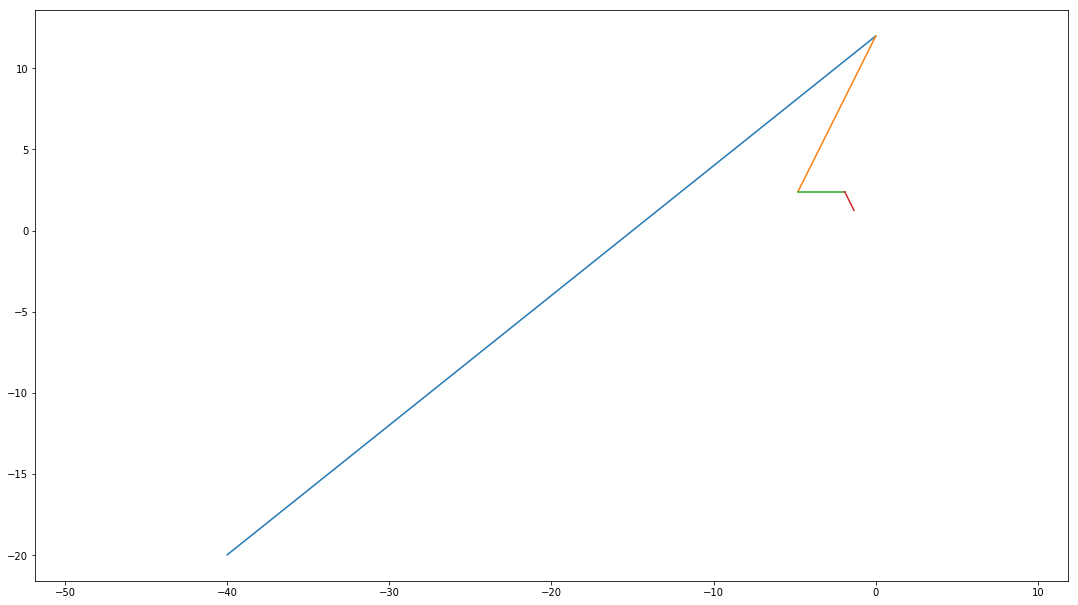

In [31]:
alpha = 1
C = np.matrix([[1, 1], [1, 1]]) + alpha * np.identity(2)
condNum = np.linalg.cond(C)
eigVals = np.linalg.eig(C)[0]
x0 = 10 # initial value
p = 0.2 # learning rate
e = 1.0 # small number for stop test
R = 20 # max iterations
print("-------------")
print("C: ", C)
print("")
print("alpha: ", alpha)
print("")
print("Conditional #: ", condNum)
print("")
print("Eigenvalues: ", eigVals)
print("")
print("Non-Singular: ", np.linalg.det(C) != 0)
gradientAscentMultiDim(x0, C, p, e, R)

-------------
C:  [[ 1.01  1.  ]
 [ 1.    1.01]]

alpha:  0.01

Conditional #:  201.0

Eigenvalues:  [ 2.01  0.01]

Non-Singular:  True
 
step:  1
x:  [[-30.3 -30. ]
 [-30.  -30.3]]
f(x):  [[-1306.7821782 -1306.7812818]
 [-1306.7812818 -1306.7821782]]
grad f(x):  [[-18.1794 -17.88  ]
 [-17.88   -18.1794]]
 
step:  2
x:  [[-18.1794 -17.88  ]
 [-17.88   -18.1794]]
f(x):  [[-467.31082019 -467.30992736]
 [-467.30992736 -467.31082019]]
grad f(x):  [[-10.9311612 -10.63236  ]
 [-10.63236   -10.9311612]]
 
step:  3
x:  [[-10.9311612 -10.63236  ]
 [-10.63236   -10.9311612]]
f(x):  [[-167.11250353 -167.11161428]
 [-167.11161428 -167.11250353]]
grad f(x):  [[-6.59659464 -6.29839104]
 [-6.29839104 -6.59659464]]
 
step:  4
x:  [[-6.59659464 -6.29839104]
 [-6.29839104 -6.59659464]]
f(x):  [[-59.76038356 -59.75949786]
 [-59.75949786 -59.76038356]]
grad f(x):  [[-4.00440431 -3.70679712]
 [-3.70679712 -4.00440431]]
 
step:  5
x:  [[-4.00440431 -3.70679712]
 [-3.70679712 -4.00440431]]
f(x):  [[-21.37083

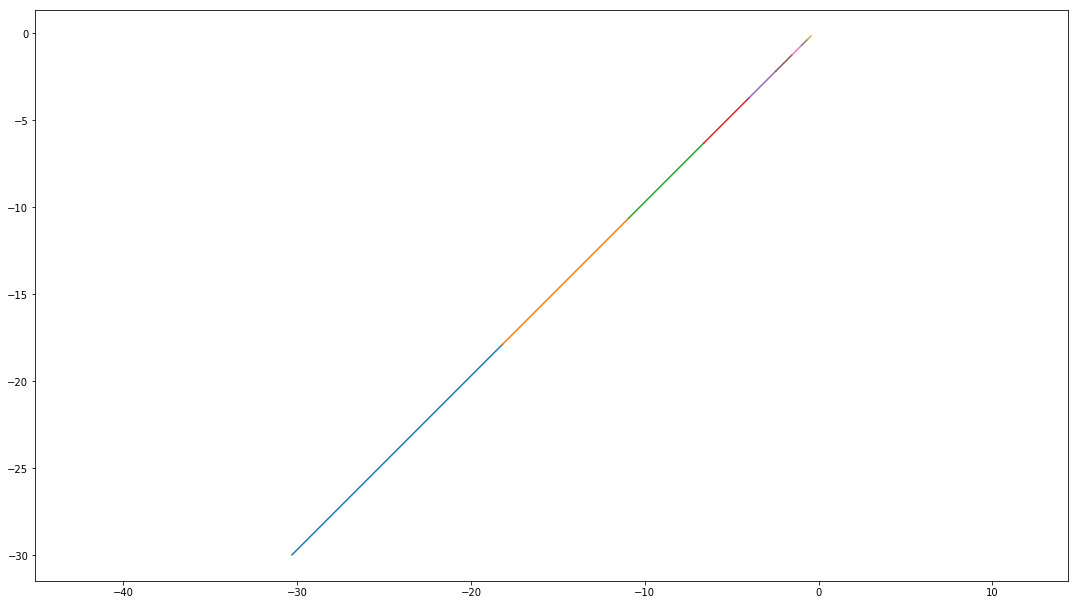

In [32]:
alpha = 0.01
C = np.matrix([[1, 1], [1, 1]]) + alpha * np.identity(2)
condNum = np.linalg.cond(C)
eigVals = np.linalg.eig(C)[0]
x0 = 15
p = 0.1
e = 0.3
R = 20
print("-------------")
print("C: ", C)
print("")
print("alpha: ", alpha)
print("")
print("Conditional #: ", condNum)
print("")
print("Eigenvalues: ", eigVals)
print("")
print("Non-Singular: ", np.linalg.det(C) != 0)
gradientAscentMultiDim(x0, C, p, e, R)

<h2> Outliers in di erent distributions

<h3> Normal Distribution

In [33]:
# 1.
R = 1000 # repetitions
N = 100 # sample size

# 2
sample = np.random.normal(size=100)
mean, sigma = sample.mean(), sample.std()

# 3
interval = st.norm.interval(0.95, loc=mean, scale=sigma)

print(mean)
print(interval)

# Yes, it falls within the 95% confidence interval

-0.145953540863
(-2.3064551454907192, 2.0145480637645998)


0.0010777628115
(-0.19857552493331165, 0.20073105055631646)


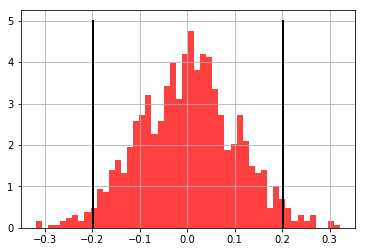

Number of m-s outside of 95% confidence interval:  46


In [36]:
R = 1000 # repetitions
N = 100 # sample size

m = []

for step in range(0, R):
    sample = np.random.standard_normal(size=100)
    mean = np.mean(sample)
    m.append(mean)

mm, sigma = np.mean(m), np.std(m)

interval = st.norm.interval(0.95, loc=mm, scale=sigma)

print(mm)
print(interval)

# histogram
n, bins, patches = plt.hist(m, 50, normed=1, facecolor='red', alpha=0.75)
plt.grid(True)
plt.plot([interval[0], interval[0]], [0, 5], color='k', linestyle='-', linewidth=2)
plt.plot([interval[1], interval[1]], [0, 5], color='k', linestyle='-', linewidth=2)

plt.show()

count = 0

for mean in m:
    if ((mean < interval[0]) or (mean > interval[1])):
        count = count + 1

print("Number of m-s outside of 95% confidence interval: ", count)

0.00120154842654
(-0.19900742060336307, 0.20141051745644167)


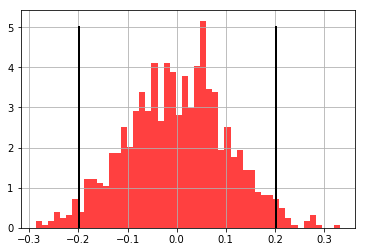

Number of m-s outside of 95% confidence interval:  48


In [37]:
R = 1000 # repetitions
N = 0.001 # sample size

m = []

for step in range(0, R):
    sample = np.random.standard_normal(size=100)
    mean = np.mean(sample)
    m.append(mean)

mm, sigma = np.mean(m), np.std(m)

interval = st.norm.interval(0.95, loc=mm, scale=sigma)

print(mm)
print(interval)

# histogram
n, bins, patches = plt.hist(m, 50, normed=1, facecolor='red', alpha=0.75)
plt.grid(True)
plt.plot([interval[0], interval[0]], [0, 5], color='k', linestyle='-', linewidth=2)
plt.plot([interval[1], interval[1]], [0, 5], color='k', linestyle='-', linewidth=2)

plt.show()

count = 0

for mean in m:
    if ((mean < interval[0]) or (mean > interval[1])):
        count = count + 1

print("Number of m-s outside of 95% confidence interval: ", count)

-0.00484071871844
(-0.20432807893267926, 0.19464664149580738)


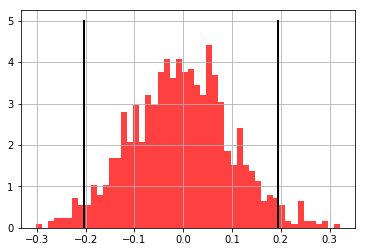

Number of m-s outside of 95% confidence interval:  57


In [39]:
R = 1000 # repetitions
N = 10000000 # sample size

m = []

for step in range(0, R):
    sample = np.random.standard_normal(size=100)
    mean = np.mean(sample)
    m.append(mean)

mm, sigma = np.mean(m), np.std(m)

interval = st.norm.interval(0.95, loc=mm, scale=sigma)

print(mm)
print(interval)

# histogram
n, bins, patches = plt.hist(m, 50, normed=1, facecolor='red', alpha=0.75)
plt.grid(True)
plt.plot([interval[0], interval[0]], [0, 5], color='k', linestyle='-', linewidth=2)
plt.plot([interval[1], interval[1]], [0, 5], color='k', linestyle='-', linewidth=2)

plt.show()

count = 0

for mean in m:
    if ((mean < interval[0]) or (mean > interval[1])):
        count = count + 1

print("Number of m-s outside of 95% confidence interval: ", count)

<h3> Pareto distribution

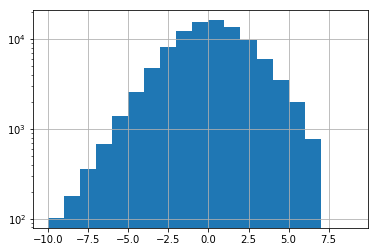

In [40]:
x0 = 1
k = 0.9
N = 100000

p = np.random.pareto(k, N)
p = list(filter(lambda x: x < 100, p))

plt.grid(True)
bins = range(-10, 10)
plt.hist(np.log2(p), log=True, bins=bins)
plt.show()

4.62549983912
(-2.1369599761109335, 11.387959654352731)


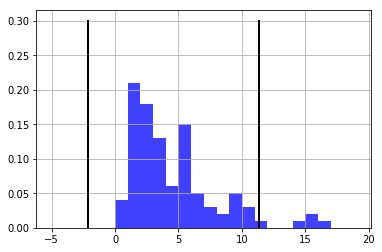

In [44]:
x0 = 1
k = 0.9
N = 10
R = 100

m = []

for step in range(0, R):
    # generate
    p = np.random.pareto(k, N)
    p = list(filter(lambda x: x < 100, p))
    # get mean
    mean = np.mean(p)
    # store mean in m
    m.append(mean)

mm, sigma = np.mean(m), np.std(m)

interval = st.norm.interval(0.95, loc=mm, scale=sigma)

print(mm)
print(interval)

# histogram
n, bins, patches = plt.hist(m, range(-5,20), normed=1, facecolor='blue', alpha=0.75)
plt.grid(True)
plt.plot([interval[0], interval[0]], [0, 0.3], color='k', linestyle='-', linewidth=2)
plt.plot([interval[1], interval[1]], [0, 0.3], color='k', linestyle='-', linewidth=2)

plt.show()

4.36269996273
(4.1755218752759591, 4.5498780501882328)


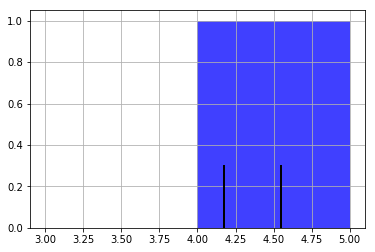

In [45]:
x0 = 1
k = 0.9
N = 10000
R = 100

m = []

for step in range(0, R):
    # generate
    p = np.random.pareto(k, N)
    p = list(filter(lambda x: x < 100, p))
    # get mean
    mean = np.mean(p)
    # store mean in m
    m.append(mean)

mm, sigma = np.mean(m), np.std(m)

interval = st.norm.interval(0.95, loc=mm, scale=sigma)

print(mm)
print(interval)

# histogram
n, bins, patches = plt.hist(m, range(3,6), normed=1, facecolor='blue', alpha=0.75)
plt.grid(True)
plt.plot([interval[0], interval[0]], [0, 0.3], color='k', linestyle='-', linewidth=2)
plt.plot([interval[1], interval[1]], [0, 0.3], color='k', linestyle='-', linewidth=2)

plt.show()

4.36155396166
(4.3011953979210524, 4.4219125253981044)


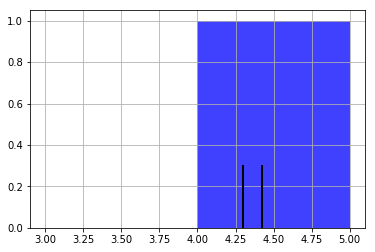

In [46]:
x0 = 1
k = 0.9
N = 100000
R = 100

m = []

for step in range(0, R):
    # generate
    p = np.random.pareto(k, N)
    p = list(filter(lambda x: x < 100, p))
    # get mean
    mean = np.mean(p)
    # store mean in m
    m.append(mean)

mm, sigma = np.mean(m), np.std(m)

interval = st.norm.interval(0.95, loc=mm, scale=sigma)

print(mm)
print(interval)

# histogram
n, bins, patches = plt.hist(m, range(3,6), normed=1, facecolor='blue', alpha=0.75)
plt.grid(True)
plt.plot([interval[0], interval[0]], [0, 0.3], color='k', linestyle='-', linewidth=2)
plt.plot([interval[1], interval[1]], [0, 0.3], color='k', linestyle='-', linewidth=2)

plt.show()

In [47]:
# As N increases, the confidence interval gets smaller and smaller.